In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

path = '/Users/chris/Desktop/uf_grad_school/uf-class-repo/radiative-processes/final-project/'

In [39]:
falc_cols = ['height','tau','m','temp','turb_vel','n_H','n_p','n_e','ptot','beta','rho']
solspect_cols = ['wave','smoothed_flux','continuum_flux','smoothed_intensity','continuum_intensity']

falc_data = pd.read_csv(path+'falc.dat.txt',delimiter=r'\s+', header=None, 
                        names=falc_cols,engine='python',comment='#')

solspect_data = pd.read_csv('./solspect.dat.txt',delimiter=r'\s+', header=None, 
                            names=solspect_cols,engine='python',comment='#')

In [40]:
falc_data

,height,tau,m,temp,turb_vel,n_H,n_p,n_e,ptot,beta,rho
0,2218.20,0.000000e+00,0.000007,100000,11.73,5.575000e+09,5.575000e+09,6.665000e+09,0.1857,0.952,1.306000e-14
1,2216.50,7.696000e-10,0.000007,95600,11.65,5.838000e+09,5.837000e+09,6.947000e+09,0.1857,0.950,1.368000e-14
2,2214.89,1.531000e-09,0.000007,90816,11.56,6.151000e+09,6.150000e+09,7.284000e+09,0.1858,0.948,1.441000e-14
3,2212.77,2.597000e-09,0.000007,83891,11.42,6.668000e+09,6.667000e+09,7.834000e+09,0.1859,0.945,1.562000e-14
4,2210.64,3.754000e-09,0.000007,75934,11.25,7.381000e+09,7.378000e+09,8.576000e+09,0.1860,0.941,1.729000e-14
...,...,...,...,...,...,...,...,...,...,...,...
75,-60.00,5.858000e+00,6.174000,8220,1.77,1.307000e+17,1.022000e+15,1.050000e+15,169100.0000,0.972,3.062000e-07
76,-70.00,8.362000e+00,6.481000,8540,1.79,1.317000e+17,1.515000e+15,1.546000e+15,177600.0000,0.972,3.085000e-07
77,-80.00,1.196000e+01,6.790000,8860,1.80,1.325000e+17,2.180000e+15,2.215000e+15,186000.0000,0.973,3.104000e-07
78,-90.00,1.695000e+01,7.102000,9140,1.82,1.337000e+17,2.942000e+15,2.979000e+15,194600.0000,0.973,3.134000e-07


### Part I

### a

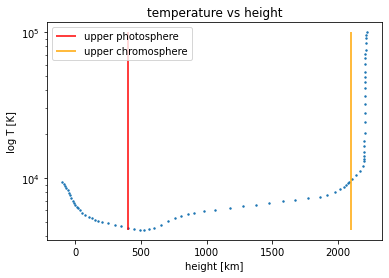

In [281]:
### part a
plt.scatter(falc_data.height, falc_data.temp, s=2)
plt.vlines([400], min(falc_data.temp), max(falc_data.temp), colors='r', label='upper photosphere')
plt.vlines([2100], min(falc_data.temp), max(falc_data.temp), colors='orange', label='upper chromosphere')
plt.title('temperature vs height')
plt.ylabel('log T [K]')
plt.xlabel('height [km]')
plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.savefig('a.png')
plt.show()

As can be seen by how the temperature profile evolves with atmosphere height, the initial drop in temperature corresponds with the photosphere; the subsequent rise from ~500 km above the surface corresponds with the chromosphere; and the abrupt rise in temperature near ~2000 km corresponds with the transition region and the corona.

Absorption lines typically form in the cooler parts of the atmosphere (the top of the photosphere and bottom of the chromosphere), while emission lines typically form in the hotter parts of the atmosphere (the upper chromosphere and the corona).

### b

    height     tau      m  temp  turb_vel           n_H           n_p  \
67    20.0  0.6746  3.869  6180      1.52  1.098000e+17  2.588000e+13   

             n_e      ptot   beta           rho  
67  4.064000e+13  106000.0  0.972  2.572000e-07  


/Users/chris/anaconda2/envs/superflare/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


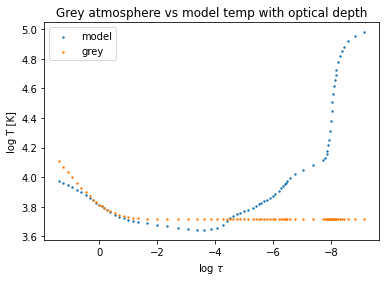

In [275]:
### part b
"""
plt.scatter(np.log10(falc_data.tau), np.log10(falc_data.temp), s=2)
plt.title('T vs optical depth')
plt.ylabel('log T [K]')
plt.xlabel(r'log $\tau$')
plt.gca().invert_xaxis()
plt.show()
"""

### compare this to grey atmosphere using Eddington-Milne approximation
# find row with tau closest to 2/3 for Teff
where_is_tau_two_thirds = falc_data.loc[(falc_data.tau > 0.63) & (falc_data.tau < 0.68)].index[0]
print(falc_data.loc[(falc_data.tau > 0.63) & (falc_data.tau < 0.68)])

# find teff, aka temp at tau=2/3 in order to calcluate grey atmosphere
teff = falc_data.iloc[where_is_tau_two_thirds].temp 
def grey_atm(tau, teff):
    temp = teff*(0.75*tau + 0.5)**0.25
    
    return temp

grey_atm_temp = grey_atm(falc_data.tau, teff)
plt.scatter(np.log10(falc_data.tau), np.log10(falc_data.temp), s=2, label='model')
plt.scatter(np.log10(falc_data.tau), np.log10(grey_atm_temp), s=2, label='grey')
#plt.scatter(np.log10(falc_data.tau), grey_atm(falc_data.tau, teff), s=2)
plt.title('Grey atmosphere vs model temp with optical depth')
plt.ylabel('log T [K]')
plt.xlabel(r'log $\tau$')
plt.gca().invert_xaxis()
plt.legend()
plt.savefig('b.png')
plt.show()

A grey atmosphere using the Eddington-Milne approximation appropriately models the photosphere but fails to model the subsequent rise in temperature in the chromosphere, transition region, and corona. 

### c

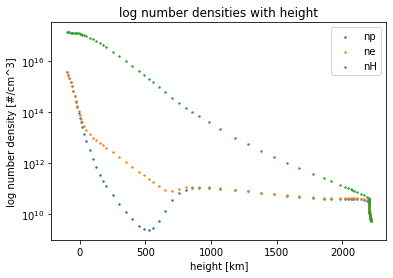

In [282]:
#plt.scatter(falc_data.height, np.log10(falc_data.n_p), s=2, label='np')
#plt.scatter(falc_data.height, np.log10(falc_data.n_e), s=2, label='ne')
#plt.scatter(falc_data.height, np.log10(falc_data.n_H), s=2, label='nH')
#plt.plot(falc_data.height, np.log10(falc_data.n_p), label='np')
#plt.plot(falc_data.height, np.log10(falc_data.n_e), label='ne')
#plt.plot(falc_data.height, np.log10(falc_data.n_H), label='nH')
plt.scatter(falc_data.height, falc_data.n_p, s=2, label='np')
plt.scatter(falc_data.height, falc_data.n_e, s=2, label='ne')
plt.scatter(falc_data.height, falc_data.n_H, s=2, label='nH')
plt.title('log number densities with height')
plt.xlabel('height [km]')
plt.ylabel('log number density [#/cm^3]')
plt.legend()
plt.yscale('log')
#plt.xscale('log')
plt.savefig('c.png')
plt.show()

The number density of protons drops going higher up the photosphere and then increases until the temperature in the chromosphere gets high enough to ionize hydrogen again. This makes sense because protons (H+) are the same as ionized hydrogen, so this ionization should increase the proton number density. The threshold at which this occurs is the height where $n_p$ and $n_e$ coincide. Of course, this means $n_H$ decreases, since the supply of neutral hydrogen is being ionized - although the overall number density of particles should decrease with height, as optical depth decreases. This is corroborated by noting how the ionization fraction profile is similar to the temperature-height profile. 

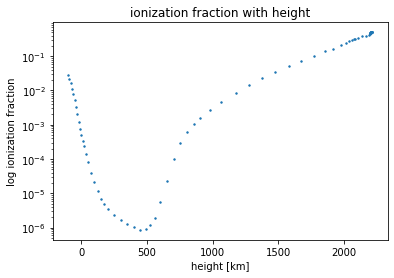

In [283]:
plt.scatter(falc_data.height, falc_data.n_p/(falc_data.n_H+falc_data.n_p), s=2)
plt.title('ionization fraction with height')
plt.xlabel('height [km]')
plt.ylabel('log ionization fraction')
plt.yscale('log')
#plt.xscale('log')
plt.savefig('c2.png')
plt.show()

### d

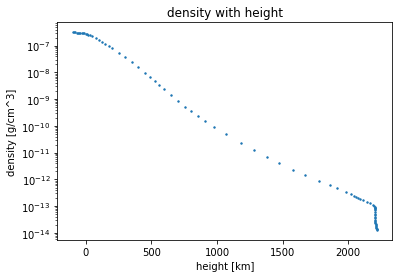

In [159]:
plt.scatter(falc_data.height, falc_data.rho, s=2)
plt.title('density with height')
plt.xlabel('height [km]')
plt.ylabel('density [g/cm^3]')
plt.yscale('log')
#plt.xscale('log')
plt.show()

2.771e-07


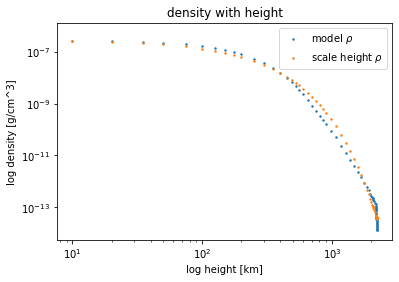

solar radius in H_rhos:  4971.428571428572
solar atmosphere in H_rhos:  16.558571428571426


In [287]:
rho0 = falc_data.loc[falc_data.height==0.0].rho[69]
print(rho0)
def rho(height, H_rho):
    #print(height)
    #print(rho0*np.exp(-height/H_rho))
    return rho0*np.exp(-height/H_rho)

plt.scatter(falc_data.height, falc_data.rho, s=2, label=r'model $\rho$')
plt.scatter(falc_data.height, rho(falc_data.height, 140), s=2, label=r'scale height $\rho$') 
plt.title('density with height')
plt.xlabel('log height [km]')
plt.ylabel('log density [g/cm^3]')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.savefig('d.png')
plt.show()

solar_radius = 696000 # km
print("solar radius in H_rhos: ", solar_radius/140)
print("solar atmosphere in H_rhos: ", (max(falc_data.height)-min(falc_data.height))/140)

After trying multiple scale height values, I settled on 140 km as the value that best fits (by eye) the density-height profile. This results in a scale height that's 1/5000th of the radius of the Sun, or 1/17th the Solar atmosphere.

The scale height is small enough compared to the solar radius such that the plane parallel assumption is valid; that is, it is dwarfed by the overall curvature of the sphere of the Sun.

### e

0          0.076974
1          0.077059
2          0.077127
3          0.077234
4          0.077384
          ...      
75    148336.056780
76    155289.814260
77    162087.276500
78    168724.025260
79    175340.615800
Length: 80, dtype: float64


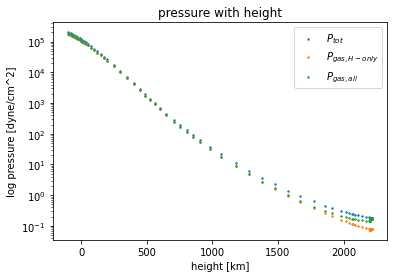

In [291]:
def ideal_gas_pressure(n, T): # pressure = n*k*T
    kB = 1.3807e-16 # cm^2 g s^-2 K^-1
    return n*kB*T

print(ideal_gas_pressure(falc_data.n_H, falc_data.temp))
plt.scatter(falc_data.height, falc_data.ptot, s=2, label='$P_{tot}$')
plt.scatter(falc_data.height, ideal_gas_pressure(falc_data.n_H, falc_data.temp), s=2, label='$P_{gas, H-only}$') 
plt.scatter(falc_data.height, ideal_gas_pressure(falc_data.n_H+falc_data.n_e, # since H includes free protons
                                                 falc_data.temp), s=2, label='$P_{gas, all}$') 

plt.title('pressure with height')
plt.xlabel('height [km]')
plt.ylabel('log pressure [dyne/cm^2]')
plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.savefig('e.png')
plt.show()

Using the number density for hydrogen only (HI and protons) to calculate the ideal gas pressure results in underestimating the pressure at the surface of the atmosphere compared to the model. This makes sense because I am not counting the contribution to the pressure from electrons. Adding them in makes my ideal gas pressure profile match up to almost the total pressure given by the model.

### f

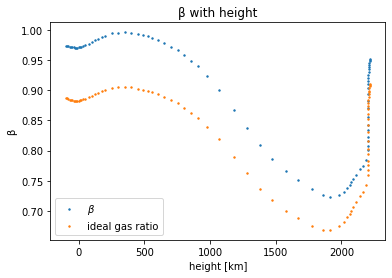

In [292]:
plt.scatter(falc_data.height, falc_data.beta, s=2, label=r'$\beta$')
plt.scatter(falc_data.height, ideal_gas_pressure(falc_data.n_H+falc_data.n_e, 
                                                 falc_data.temp)/falc_data.ptot, s=2, label='ideal gas ratio') 
#plt.scatter(falc_data.height, ideal_gas_pressure(falc_data.n_H, 
#                                                 falc_data.temp)/falc_data.ptot, s=2, label='ideal gas ratio w/H') 
plt.title('β with height')
plt.xlabel('height [km]')
plt.ylabel('β')
#plt.yscale('log')
plt.legend()
plt.savefig('f.png')
plt.show()

The $P_{gas}$ to $P_{tot}$ ratios follow the same profile, modulo some contribution, presumably from radiation. The ideal gas ratio may underpredict $P_{gas}$ closer to the surface because the ideal gas law assumes that the distance between particles is much larger than particle sizes, which is consistent with how the two ratios converge as the atmosphere density decreases with height.

### g

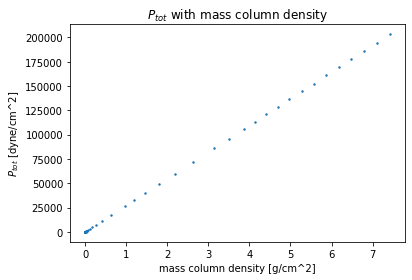

model assumed surface gravity of:  27398.185100288993 , or logg is:  4.4377217954103525


In [294]:
plt.scatter(falc_data.m, falc_data.ptot, s=2)
plt.title('$P_{tot}$ with mass column density')
plt.xlabel('mass column density [g/cm^2]')
plt.ylabel('$P_{tot}$ [dyne/cm^2]')
#plt.yscale('log')
plt.savefig('g.png')
plt.show()

print("model assumed surface gravity of: ", np.mean(falc_data.ptot/falc_data.m), 
      ", or logg is: ", np.log10(np.mean(falc_data.ptot/falc_data.m)))

### h

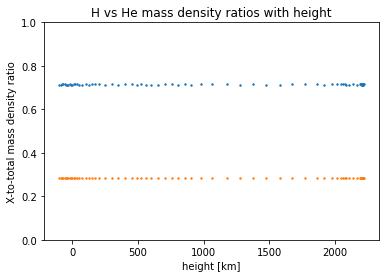

metal fraction:  0.00217112787903595


In [296]:
m_H = 1.6736e-24 # grams
he_h_abundance_ratio = 0.1
he_h_mass_ratio = 3.97

plt.scatter(falc_data.height, m_H*falc_data.n_H/falc_data.rho, s=2)
plt.scatter(falc_data.height, he_h_abundance_ratio* he_h_mass_ratio * m_H * falc_data.n_H/falc_data.rho, s=2)
plt.title('H vs He mass density ratios with height')
plt.xlabel('height [km]')
plt.ylabel('X-to-total mass density ratio')
plt.ylim(0,1)
plt.savefig('h.png')
plt.show()

print("metal fraction: ", 1-np.median(m_H*falc_data.n_H/falc_data.rho)-np.median(he_h_abundance_ratio* he_h_mass_ratio * m_H * falc_data.n_H/falc_data.rho))



### i

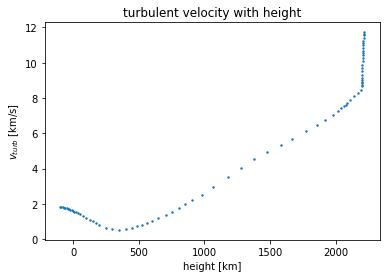

In [297]:
plt.scatter(falc_data.height, falc_data.turb_vel, s=2)
plt.title('turbulent velocity with height')
plt.xlabel('height [km]')
plt.ylabel('$v_{turb}$ [km/s]')
#plt.xscale('log')
plt.savefig('i.png')
plt.show()

The turbulent velocity profile follows the temperature profile, reflecting the stratification of the Solar atmosphere - as the gas heats up through the chromosphere and up into the corona, the particles of that gas move faster. 

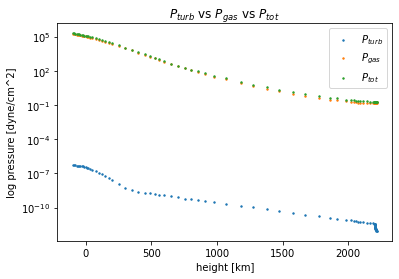

In [298]:
def pressure_turb(rho, v_turb):
    return 0.5*rho*v_turb**2

plt.scatter(falc_data.height, pressure_turb(falc_data.rho, falc_data.turb_vel), s=2, label='$P_{turb}$')
plt.scatter(falc_data.height, ideal_gas_pressure(falc_data.n_H+falc_data.n_e, # since H includes free protons
                                                 falc_data.temp), s=2, label='$P_{gas}$')
plt.scatter(falc_data.height, falc_data.ptot, s=2, label='$P_{tot}$')
plt.title('$P_{turb}$ vs $P_{gas}$ vs $P_{tot}$')
plt.xlabel('height [km]')
plt.ylabel('log pressure [dyne/cm^2]')
plt.yscale('log')
plt.legend()
plt.savefig('i2.png')
plt.show()

The turbulent pressure is 12 orders of mangitude smaller than gas pressure. Its contribution to the total pressure is insignificant. 

### Part II

### k

In [171]:
solspect_data.head()

,wave,smoothed_flux,continuum_flux,smoothed_intensity,continuum_intensity
0,0.20,0.02,0.04,0.03,0.04
1,0.22,0.07,0.11,0.14,0.20
2,0.24,0.09,0.20,0.18,0.30
3,0.26,0.19,0.40,0.37,0.50
4,0.28,0.35,0.70,0.59,1.19


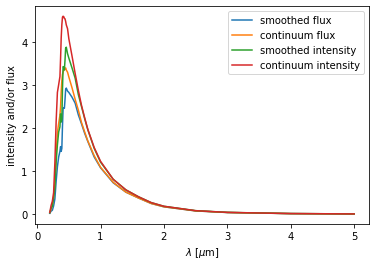

continuum intensity peak at:  0.41


In [299]:
plt.plot(solspect_data.wave, solspect_data.smoothed_flux, label='smoothed flux')
plt.plot(solspect_data.wave, solspect_data.continuum_flux, label='continuum flux')
plt.plot(solspect_data.wave, solspect_data.smoothed_intensity, label='smoothed intensity')
plt.plot(solspect_data.wave, solspect_data.continuum_intensity, label='continuum intensity')
#plt.title('$P_{turb}$ vs $P_{gas}$ vs $P_{tot}$')
plt.xlabel(r'$\lambda$ [$\mu$m]')
plt.ylabel('intensity and/or flux')
#plt.ylabel('log pressure [dyne/cm^2]')
#plt.yscale('log')
plt.legend()
plt.savefig('k.png')
plt.show()

continuum_intensity_peaks_at = np.argmax(solspect_data.continuum_intensity)
print("continuum intensity peak at: ", solspect_data.wave[continuum_intensity_peaks_at])

### l

See writeup for the requested analytical solution.

### m

In [202]:
falc_data.loc[(falc_data.height<2200.)&(falc_data.height>2000.)]

,height,tau,m,temp,turb_vel,n_H,n_p,n_e,ptot,beta,rho
22,2199.0,1.901000e-08,0.000007,13000,8.66,4.244000e+10,3.456000e+10,3.695000e+10,0.1874,0.801,9.944000e-14
23,2190.0,4.150000e-08,0.000007,12000,8.48,4.854000e+10,3.411000e+10,3.663000e+10,0.1900,0.785,1.137000e-13
24,2168.0,9.845000e-08,0.000007,11150,8.30,5.500000e+10,3.619000e+10,3.889000e+10,0.1974,0.775,1.289000e-13
25,2140.0,1.755000e-07,0.000008,10550,8.10,6.252000e+10,3.806000e+10,4.095000e+10,0.2079,0.769,1.465000e-13
26,2110.0,2.620000e-07,0.000008,9900,7.87,7.314000e+10,3.923000e+10,4.238000e+10,0.2209,0.760,1.714000e-13
27,2087.0,3.300000e-07,0.000008,9450,7.70,8.287000e+10,3.954000e+10,4.291000e+10,0.2324,0.753,1.942000e-13
28,2075.0,3.659000e-07,0.000009,9200,7.61,8.882000e+10,3.956000e+10,4.305000e+10,0.2390,0.748,2.081000e-13
29,2062.0,4.049000e-07,0.000009,8950,7.52,9.569000e+10,3.952000e+10,4.314000e+10,0.2467,0.743,2.242000e-13
30,2043.0,4.620000e-07,0.000009,8700,7.41,1.055000e+11,3.937000e+10,4.314000e+10,0.2590,0.738,2.471000e-13
31,2017.0,5.405000e-07,0.000010,8400,7.26,1.203000e+11,3.921000e+10,4.313000e+10,0.2778,0.732,2.818000e-13


temp at surface:  4400
temp at upper photosphere:  4560
temp at upper chromosphere:  11150
temp in corona:  100000
teff:  5770


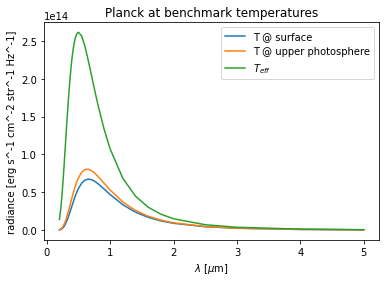

In [300]:
def planck(lam, T):
    lam = lam*1e-4
    h = 6.6261e-27 # cm^2 g s^-1
    kB = 1.3807e-16 # cm^2 g s^-2 K^-1
    c = 3e10 # cm s^-2
    factor1 = (2*h*c**2)/(lam**5)
    exp_arg = h*c/(lam*kB*T)
    factor2 = 1/(np.exp(exp_arg) - 1)

    return factor1*factor2

def planck_si(lam, T):
    lam = lam*1e-6
    h = 6.6261e-34 
    kB = 1.3807e-23 
    c = 3e8
    factor1 = (2*h*c**2)/(lam**5)
    exp_arg = h*c/(lam*kB*T)
    factor2 = 1/(np.exp(exp_arg) - 1)

    return factor1*factor2

def planck_normalized(lam, T):
    lam = lam*1e-4
    h = 6.6261e-27 # cm^2 g s^-1
    kB = 1.3807e-16 # cm^2 g s^-2 K^-1
    c = 3e10 # cm s^-2
    factor1 = (2*h*c**2)/(lam**5)
    exp_arg = h*c/(lam*kB*T)
    factor2 = 1/(np.exp(exp_arg) - 1)

    return factor1*factor2*1e-14

temp1 = min(falc_data.temp)
temp2 = falc_data.loc[falc_data.height==400.].temp[55]
temp3 = falc_data.loc[falc_data.height==2168.0].temp[24]
temp4 = max(falc_data.temp)
temp5 = 5770
print("temp at surface: ", temp1)
print("temp at upper photosphere: ", temp2)
print("temp at upper chromosphere: ", temp3)
print("temp in corona: ", temp4)
print("teff: ", temp5)
plt.plot(solspect_data.wave, planck(solspect_data.wave, temp1), label='T @ surface')
plt.plot(solspect_data.wave, planck(solspect_data.wave, temp2), label='T @ upper photosphere')
#plt.plot(solspect_data.wave, planck(solspect_data.wave, temp3), label='T @ upper chromosphere')
#plt.plot(solspect_data.wave, planck(solspect_data.wave, temp4), label='T in corona')
plt.plot(solspect_data.wave, planck(solspect_data.wave, temp5), label=r'$T_{eff}$')

plt.xlabel(r'$\lambda$ [$\mu$m]')
plt.ylabel('radiance [erg s^-1 cm^-2 str^-1 Hz^-1]')
plt.title('Planck at benchmark temperatures')
#plt.yscale('log')
plt.legend()
plt.savefig('m.png')
plt.show()

### n

It looks like there are unit issues, so I am going to multiply my Planck function by 1e-14 to get it normalized down to what's in the Allen 1976 data. This way, I can feasibly fit to it. 

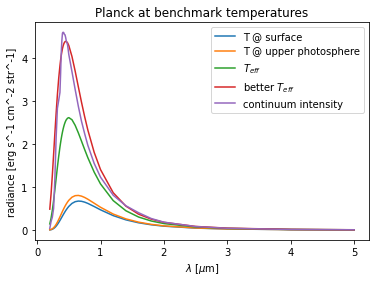

In [255]:
# find temperature that corresponds with peak at 0.41 micron wavelength
plt.plot(solspect_data.wave, 1e-14*planck(solspect_data.wave, temp1), label='T @ surface')
plt.plot(solspect_data.wave, 1e-14*planck(solspect_data.wave, temp2), label='T @ upper photosphere')
#plt.plot(solspect_data.wave, 1e-14*planck(solspect_data.wave, temp3), label='T @ upper chromosphere')
#plt.plot(solspect_data.wave, 1e-14*planck(solspect_data.wave, temp4), label='T in corona')
plt.plot(solspect_data.wave, 1e-14*planck(solspect_data.wave, temp5), label=r'$T_{eff}$')
plt.plot(solspect_data.wave, 1e-14*planck(solspect_data.wave, 6400), label=r'better $T_{eff}$')

plt.plot(solspect_data.wave, solspect_data.continuum_intensity, label='continuum intensity')

plt.xlabel(r'$\lambda$ [$\mu$m]')
plt.ylabel('radiance [erg s^-1 cm^-2 str^-1]')
plt.title('Planck at benchmark temperatures')
#plt.yscale('log')
plt.legend()
plt.show()

Let's properly fit using scipy.optimize.curve_fit.

[6331.42826665] [[715.0236618]]


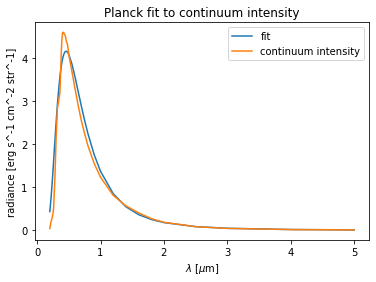

In [301]:
import scipy
opt, cov = scipy.optimize.curve_fit(planck_normalized, xdata=solspect_data.wave, 
                                    ydata=solspect_data.continuum_intensity, p0=[6400])
print(opt, cov)

plt.plot(solspect_data.wave, planck_normalized(solspect_data.wave, opt), label='fit')
plt.plot(solspect_data.wave, solspect_data.continuum_intensity, label='continuum intensity')
plt.title('Planck fit to continuum intensity')
plt.xlabel(r'$\lambda$ [$\mu$m]')
plt.ylabel('radiance [erg s^-1 cm^-2 str^-1]')
plt.legend()
plt.savefig('n.png')
plt.show()

The best-fit blackbody temperature for the Sun is 6331 K.

### o

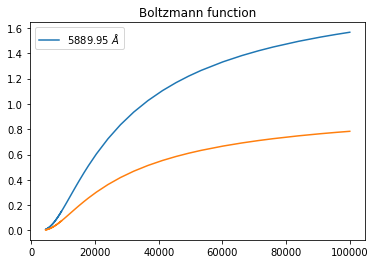

In [320]:
def saha(u_i, u_ii, n_e, T, chi):
    factor1 = 2*u_ii/(n_e*u_i)
    factor2 = (2*np.pi*m_e*kB*T/(h**2))**1.5
    factor3 = np.exp(-(chi)/(kB*T))
    ratio = factor1*factor2*factor3
    
    return ratio

def boltzmann(E1, E2, g1, g2, T):
    exp_arg = -(E2-E1)/(kB*T)
    ratio = (g2/g1)*np.exp(exp_arg)
    
    return ratio

### constants
h = 6.6261e-27 # cm^2 g s^-1
kB = 1.3807e-16 # cm^2 g s^-2 K^-1
m_e = 9.1094e-28 # grams
c = 3e10

### variables
ev = 1.6022e-12 # erg
E_u1 = 2.1044*ev
E_l1 = 0.*ev
E_u2 = 2.1022*ev
E_l2 = 0.*ev
E_ion = 5.14*ev
gu1 = 4
gl1 = 2
gu2 = 2
gl2 = 2
flu1 = 0.641
flu2 = 0.320
angstrom_to_cm = 1e-8
lam1 = 5889.95*angstrom_to_cm
lam2 = 5895.92*angstrom_to_cm
u_na_ii = 6
u_na_i = 1
A_Na = 1.8e-6 

n_e = falc_data.iloc[67].n_e # take e- number density where we previously found to be tau==2/3, ie. where Teff is
n_H = falc_data.iloc[67].n_H # take H number density where we previously found to be tau==2/3, ie. where Teff is
plt.plot(falc_data.temp, boltzmann(E_l1, E_u1, gl1, gu1, falc_data.temp), label=r'5889.95 $\AA$')
plt.plot(falc_data.temp, boltzmann(E_l2, E_u2, gl2, gu2, falc_data.temp))
plt.title("Boltzmann function")
plt.legend()
plt.show()


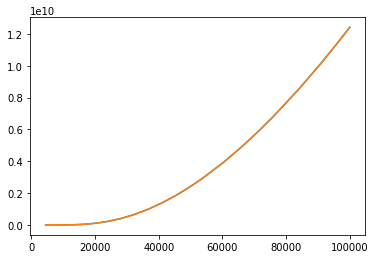

In [303]:
plt.plot(falc_data.temp, saha(u_na_i, u_na_ii, n_e, falc_data.temp, E_ion))
plt.plot(falc_data.temp, saha(u_na_i, u_na_ii, n_e, falc_data.temp, E_ion))
plt.show()

### p

In [317]:
e = 4.8032e-10 # erg

def alpha_NaD(lam0, flu, T):
    factor1 = (np.sqrt(np.pi)*e**2)/(m_e*c)
    factor2 = lam0**2/c
    #factor3 = n_l/n_e
    factor3 = 1/(1+boltzmann(E_l1, E_u1, gl1, gu1, falc_data.temp)+saha(u_na_i, u_na_ii, n_e, falc_data.temp, E_ion))
    factor4 = n_H*A_Na*flu
    exp_arg = -(h*c)/(lam0*kB*T)
    factor5 = 1 - np.exp(exp_arg)

    return factor1*factor2*factor3*factor4*factor5

### q

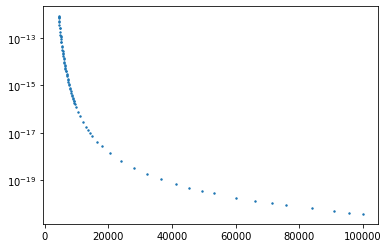

In [318]:
plt.scatter(falc_data.temp, alpha_NaD(lam1, flu1, falc_data.temp), s=2)
plt.yscale('log')
plt.show()

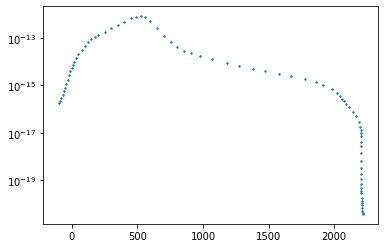

In [336]:
plt.scatter(falc_data.height, alpha_NaD(lam1, flu1, falc_data.temp), s=2)
plt.yscale('log')
plt.show()

In [ ]:
plt.scatter(falc_data.height, alpha_NaD(lam1, flu1, falc_data.loc[f]))

In [334]:
falc_data.temp

0     100000
1      95600
2      90816
3      83891
4      75934
       ...  
75      8220
76      8540
77      8860
78      9140
79      9400
Name: temp, Length: 80, dtype: int64

I would expect to see absorption lines for Na I D at temperatures below 6500 K because that is where the absorption coefficient is highest.

### r

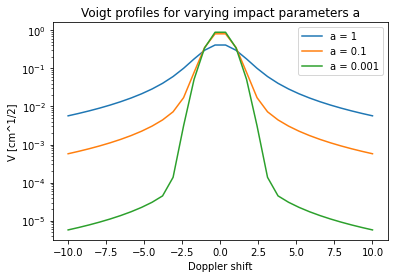

In [333]:
import scipy.integrate

def Voigt(a, u):
    I = scipy.integrate.quad(lambda y: np.exp(-y**2)/(a**2 + (u - y)**2),-np.inf, np.inf)[0]
    return (a/np.pi)*I

#a_list = [0.1, 1, 0.001]
u_range = np.linspace(-10,10,30)
plt.plot(u_range, [Voigt(1, u) for u in u_range], label='a = 1')
plt.plot(u_range, [Voigt(0.1, u) for u in u_range], label='a = 0.1')
plt.plot(u_range, [Voigt(0.001, u) for u in u_range], label='a = 0.001')
plt.yscale('log')
plt.legend()
plt.title('Voigt profiles for varying impact parameters a')
plt.ylabel('V [cm^1/2]')
plt.xlabel('Doppler shift')
plt.show()

The larger the impact parameter, the broader the Voigt profile. This makes sense because the less direct of a line of sight I have, the more scattering - and therefore broadening - I get. 

### s

In [ ]:
def integrate_alpha():
    alpha = scipy.integrate.quad(lambda x: alpha_NaD(lam1, flu1, falc_data.temp),-np.inf, np.inf)[0]
    alpha = scipy.integrate.quad(lambda x: np.exp(-y**2)/(a**2 + (u - y)**2),-np.inf, np.inf)[0]
    return alpha